In [1]:
import gensim
from gensim import corpora

lda = gensim.models.LdaModel.load("../data/LDA_data/2021032315_Step2_clean_data_10/model5.gensim")


In [2]:
import pickle
with open("../data/LDA_data/2021032315_Step2_clean_data_10/corpus.pkl",'rb') as f:
    corpus = pickle.load(f)

In [31]:
with open("../data/token/Step2/clean_data.pkl",'rb') as f:
    data = pickle.load(f)

In [160]:
len(data[0][0])

74

In [7]:
with open("../data/clean_doc.pkl",'rb') as f:
    clean_doc = pickle.load(f)

## doc and top matrix

In [12]:
#init
import numpy as np
import pandas as pd
d = np.zeros((len(corpus),10))


In [13]:
for i, doc in enumerate(lda[corpus]):
    # print(doc)
    for topic in doc:
        d[i][topic[0]] = topic[1]


In [16]:
doctm = pd.DataFrame(d, columns=range(1,11))

In [8]:
clean_doc = clean_doc[0] +clean_doc[1] +clean_doc[2]

In [169]:
doctm['paper'] = clean_doc

In [20]:
ind = np.argwhere(d==np.amax(d,1, keepdims=True))

In [24]:
import pandas as pd
ind = pd.DataFrame(ind, columns=['doc_id',"max_topic"])

In [25]:
ind.groupby('max_topic')['doc_id'].nunique()

max_topic
0    560
1    419
2    235
3    612
4     44
5    277
6    496
7    397
8    187
9    586
Name: doc_id, dtype: int64

In [26]:
topic_num_docid = []
for i,x in ind.iterrows():
    if x['max_topic'] ==4:
        topic_num_docid.append(x['doc_id'])
        # print(x['doc_id'],end="  ")

In [39]:
doctm['max_top'] = ind['max_topic']+1

In [168]:
doctm['token'] = data

<ipython-input-168-fd441da5ad54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doctm['token'] = data


In [171]:
doctm = doctm[['paper', 1, 2,3,4,5,6,7,8,9,10,'max_top']]

In [204]:
K = lda.num_topics
topicWordProbMat = lda.print_topics(K)
df = pd.DataFrame(np.matrix(topicWordProbMat))

In [205]:
df

,0,1
0,0,"0.008*""實驗"" + 0.007*""使用"" + 0.007*""進行"" + 0.005*""..."
1,1,"0.009*""藝術"" + 0.008*""創作"" + 0.008*""作品"" + 0.005*""..."
2,2,"0.008*""臺灣"" + 0.006*""中國"" + 0.006*""研究"" + 0.005*""..."
3,3,"0.026*""研究"" + 0.009*""顯著"" + 0.008*""影響"" + 0.008*""..."
4,4,"0.010*""漢語"" + 0.008*""語言"" + 0.008*""華語"" + 0.006*""..."
5,5,"0.009*""音樂"" + 0.009*""研究"" + 0.007*""小節"" + 0.006*""..."
6,6,"0.023*""學生"" + 0.018*""研究"" + 0.011*""學習"" + 0.010*""..."
7,7,"0.020*""學生"" + 0.016*""研究"" + 0.015*""教師"" + 0.013*""..."
8,8,"0.017*""研究"" + 0.008*""家庭"" + 0.007*""工作"" + 0.006*""..."
9,9,"0.010*""研究"" + 0.005*""公司"" + 0.005*""發展"" + 0.004*""..."


In [209]:
with open("df_1.pkl",'wb') as f:
    pickle.dump(df[['index','top_word']],f)

In [206]:
df['top_word'] = df[1]

In [214]:
df.index

RangeIndex(start=0, stop=10, step=1)

In [213]:
df[['index']] = df.index+1

ValueError: could not broadcast input array from shape (10) into shape (10,1)

In [42]:
doctm_t = doctm.T

In [62]:
len(doctm)

3804

In [166]:
doctm =doctm[[1,	2	,3,	4,	5,	6,	7,	8,	9,	10,	'max_top']]

In [172]:
with open("df.pkl",'wb') as f:
    pickle.dump(doctm,f)

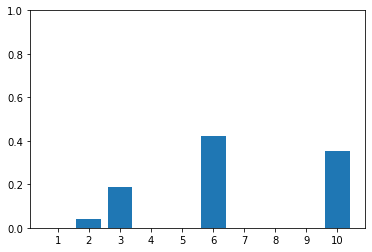

In [109]:
import numpy as np
import matplotlib.pyplot as plt
 
x_pos = np.arange(1,11)
w =1000
F = [doctm[1][w],doctm[2][w],doctm[3][w],doctm[4][w],doctm[5][w],doctm[6][w],doctm[7][w],doctm[8][w],doctm[9][w],doctm[10][w]]
plt.bar(x_pos, F)

plt.xticks(range(1,11))
plt.ylim(0,1)

plt.show()

In [115]:
docid = 1
doctm[doctm.index == docid]

,paper,token,1,2,3,4,5,6,7,8,9,10,max_top
1,[ 國立臺灣師範大學運動與休閒學院 運動休閒與餐旅管理研究所 碩士學位論文 不同形式之自然體...,"[[國立臺灣師範大學, 運動, 休閒, 學院, 運動休閒, 餐旅管理, 研究所, 碩士, 學...",0.016277,0.013808,0.0,0.158678,0.0,0.0,0.032807,0.43902,0.0,0.339389,8


1

In [142]:
doctm[doctm.index == docid][['paper','token']]

,paper,token
1,[ 國立臺灣師範大學運動與休閒學院 運動休閒與餐旅管理研究所 碩士學位論文 不同形式之自然體...,"[[國立臺灣師範大學, 運動, 休閒, 學院, 運動休閒, 餐旅管理, 研究所, 碩士, 學..."


In [161]:
# for x in doctm[doctm.index == 1]['paper']:
#     print(x)
a = pd.DataFrame({'paper':data[1]})

In [155]:
len(doctm[doctm.index == 1]['paper'])
    # print(x)
    # break

1

In [162]:
a

,paper
0,"[國立臺灣師範大學, 運動, 休閒, 學院, 運動休閒, 餐旅管理, 研究所, 碩士, 學位..."
1,"[關鍵字, 主題活動, 活動形式, Google Analytics, 決策樹, 預測模型,..."
2,"[研究資料, 蒐集, 部分, 感謝, 林務局, 提供, 林務局, 自然教育中心, 服務, 資..."
3,"[感謝, 修業, 期間, 運動休閒, 餐旅管理, 研究所, 課堂, 老師, 包含, 林儷蓉,..."
4,"[研究, 孤獨, 感謝, 一路, 走來, 陪伴, 支持, 研究, 夥伴, 成為, 持續, 感..."
...,...
411,"[蔡明學, 應用, 決策樹分析, 視導, 人員, 專業能力, 學校, 視導, 績效, 關係,..."
412,"[鄭江宇, 張佳榮, 黃哲彥, 掌握, 行銷, 不可, 網站流量分析, Google Ana..."
413,"[謝智謀, 王怡婷, 體驗教育, 帶領, 內省, 指導, 手冊, 臺北市, 幼獅, nap,..."
414,"[羅幸惠, 筆記, 自然, 臺中市, 鄉宇, 文化]"
